In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import binom, norm

In [2]:
y = np.array([21,20,15]) # number of yes
n = np.array([48,34,21]) # total
Z = np.array([10,30,50]) # NO2 concentration

data_air = np.zeros((3,3))
data_air[:,0] = y
data_air[:,1] = n
data_air[:,2] = Z

alpha = 4.48
beta = 0.76

# creation of x 
x = np.array([alpha + beta*Z[i] + np.random.normal(0,np.sqrt(81.14)) for i in np.arange(0,3)])

In [3]:
# Function for log likelihood
def log_likelihood(theta, x, n, y):
    theta = 1 / (1 + np.exp(-(theta[0] + theta[1]*x)))
    return np.sum(binom.logpmf(y, n, theta))

# Function for log prior
def log_prior(theta):
    return norm.logpdf(theta[0], 0, np.sqrt(1000)) + norm.logpdf(theta[1], 0, np.sqrt(1000))

# Function for log posterior
def log_posterior(theta, x, n, y):
    return log_likelihood(theta, x, n, y) + log_prior(theta)

In [4]:
def metropolis_within_gibbs(x, n, y, initial_beta, iterations, proposal_sd):
    p = len(initial_beta)
    chain = np.zeros((iterations, p))
    chain[0] = initial_beta
    
    for t in range(1, iterations):
        current_theta = chain[t-1]
        
        for i in range(p):
            # Proposition for coordinate i
            proposal = np.copy(current_theta)
            proposal[i] += np.random.normal(0, proposal_sd[i])
            
            # Calculate alpha
            alpha = np.exp(log_posterior(proposal, x, n, y) - log_posterior(current_theta, x, n, y))
            
            
            if np.random.rand() < alpha:
                current_theta = proposal
        
        chain[t] = current_theta
    
    return chain

In [11]:
# Parameters for our algorithm
initial_beta = np.array([0, 0])
iterations = 10000
proposal_sd = [1,1]  


beta_chain = metropolis_within_gibbs(x, n, y, initial_beta, iterations, proposal_sd)

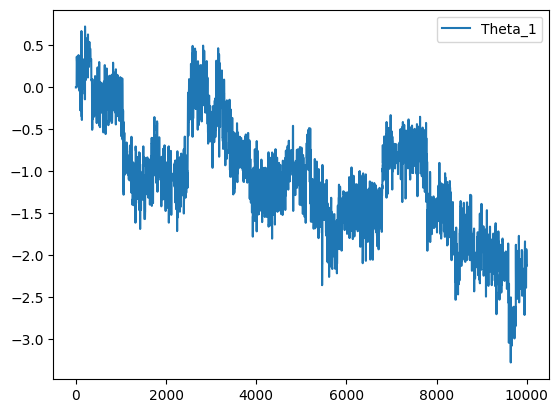

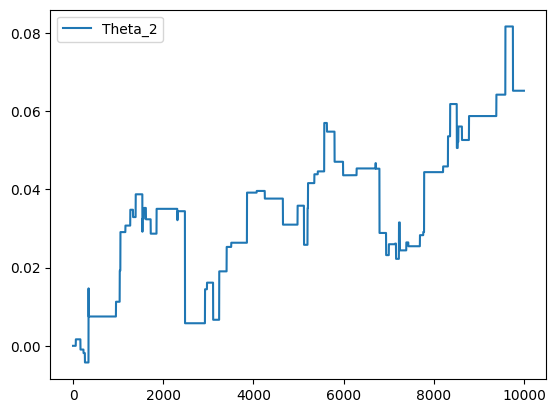

In [12]:
plt.plot(beta_chain[:,0], label="Theta_1")
plt.legend()
plt.show()
plt.plot(beta_chain[:,1], label="Theta_2")
plt.legend()
plt.show()

In [20]:
import numpy as np
from scipy.stats import norm, bernoulli

# Define the log likelihood function for logistic regression
def log_likelihood(theta, z, y, n):
    p = 1 / (1 + np.exp(-(theta[0] + theta[1] * z)))
    return np.sum(y * np.log(p) + (n - y) * np.log(1 - p))

# Define the log prior function (normal distribution)
def log_prior(theta, mu, sigma):
    return np.sum(norm.logpdf(theta, mu, sigma))

# Define the log posterior function
def log_posterior(theta, z, y, n, mu, sigma):
    return log_likelihood(theta, z, y, n) + log_prior(theta, mu, sigma)

# Initialize the sampler
theta = np.array([0.0, 0.0])  # Initial values for theta
n_iter = 10000  # Number of iterations
sigma_proposal = [2,0.02]  # Standard deviation of the proposal distribution

# Placeholders for the samples
samples = np.zeros((n_iter, 2))

# Sample data (this would be your actual data)
z = np.array([10, 20, 30])  # Mid-point of NO2 categories
y = np.array([21, 14, 21])  # Number of 'Yes' responses in each category
n = np.array([48, 34, 47])  # Total number of cases in each category

# Priors
mu_prior = 0
sigma_prior = 1000

# Run the Gibbs sampler
for i in range(n_iter):
    # Propose new values for theta
    theta_proposal = theta + np.random.normal(0, sigma_proposal, 2)
    
    # Calculate the log acceptance ratio
    log_alpha = (log_posterior(theta_proposal, z, y, n, mu_prior, sigma_prior) -
                 log_posterior(theta, z, y, n, mu_prior, sigma_prior))
    
    # Accept or reject the proposal
    if np.log(np.random.rand()) < log_alpha:
        samples[i, :] = theta_proposal
    else :
        samples[i, :] = samples[i-1,:]
    
    

# Burn-in and thinning
burn_in = int(0.1 * n_iter)
thinning = 10
samples_thinned = samples[burn_in::thinning, :]

# Estimated parameters
theta1_estimate = np.mean(samples_thinned[:, 0])
theta2_estimate = np.mean(samples_thinned[:, 1])

theta1_estimate, theta2_estimate


(-0.2647317919342601, -4.8428820310451405e-06)

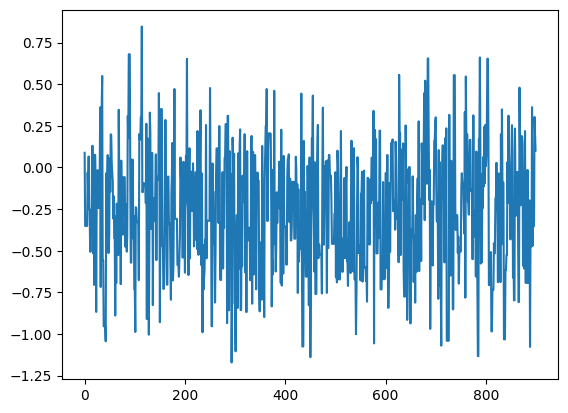

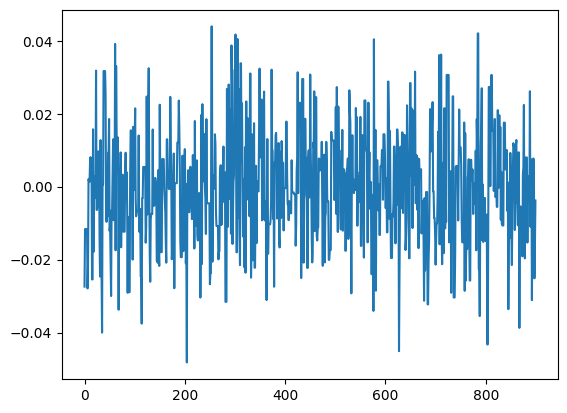

In [21]:
plt.plot(samples_thinned[:,0])
plt.show()
plt.plot(samples_thinned[:,1])
plt.show()